In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [9]:
# Import `Sequential` from `keras.models`
from tensorflow.keras.models import Sequential

# Import `Dense` from `keras.layers`
from tensorflow.keras.layers import Dense

In [104]:
df_Bank = pd.read_csv('bank.csv')

In [105]:
df_Bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [106]:
df_Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [107]:
df_Bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [108]:
df_Bank.isnull().count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [109]:
df_Bank.groupby('Exited').count()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002090F52C2E8>,
      dtype=object)

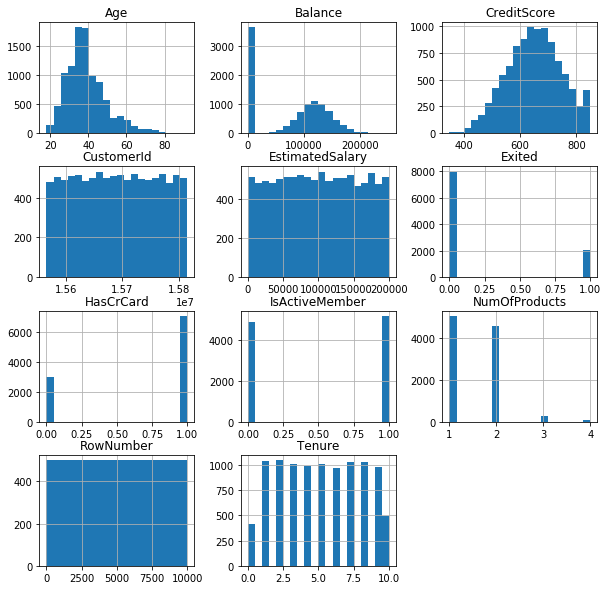

In [110]:
df_Bank.hist(figsize=(10,10), bins=20)

In [111]:
#column row number doesnt make any sense hence dropping it
df_Bank.drop('RowNumber',axis = 1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002090FBCDC50>,
      dtype=object)

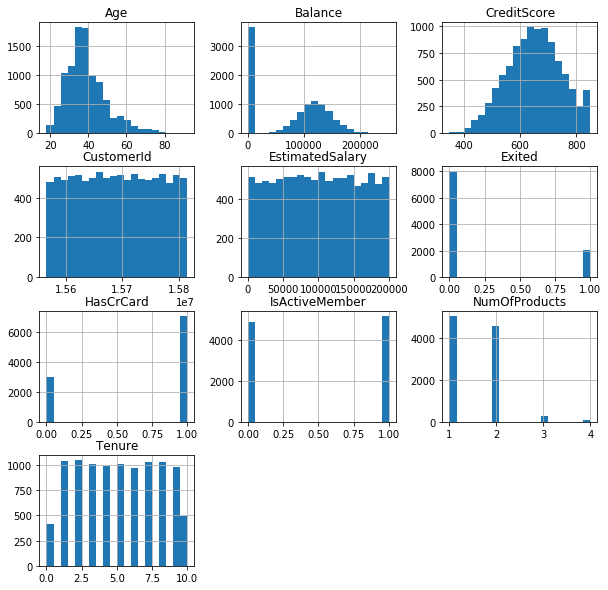

In [112]:
df_Bank.hist(figsize=(10,10), bins=20)

C:\Users\kmondal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kmondal\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


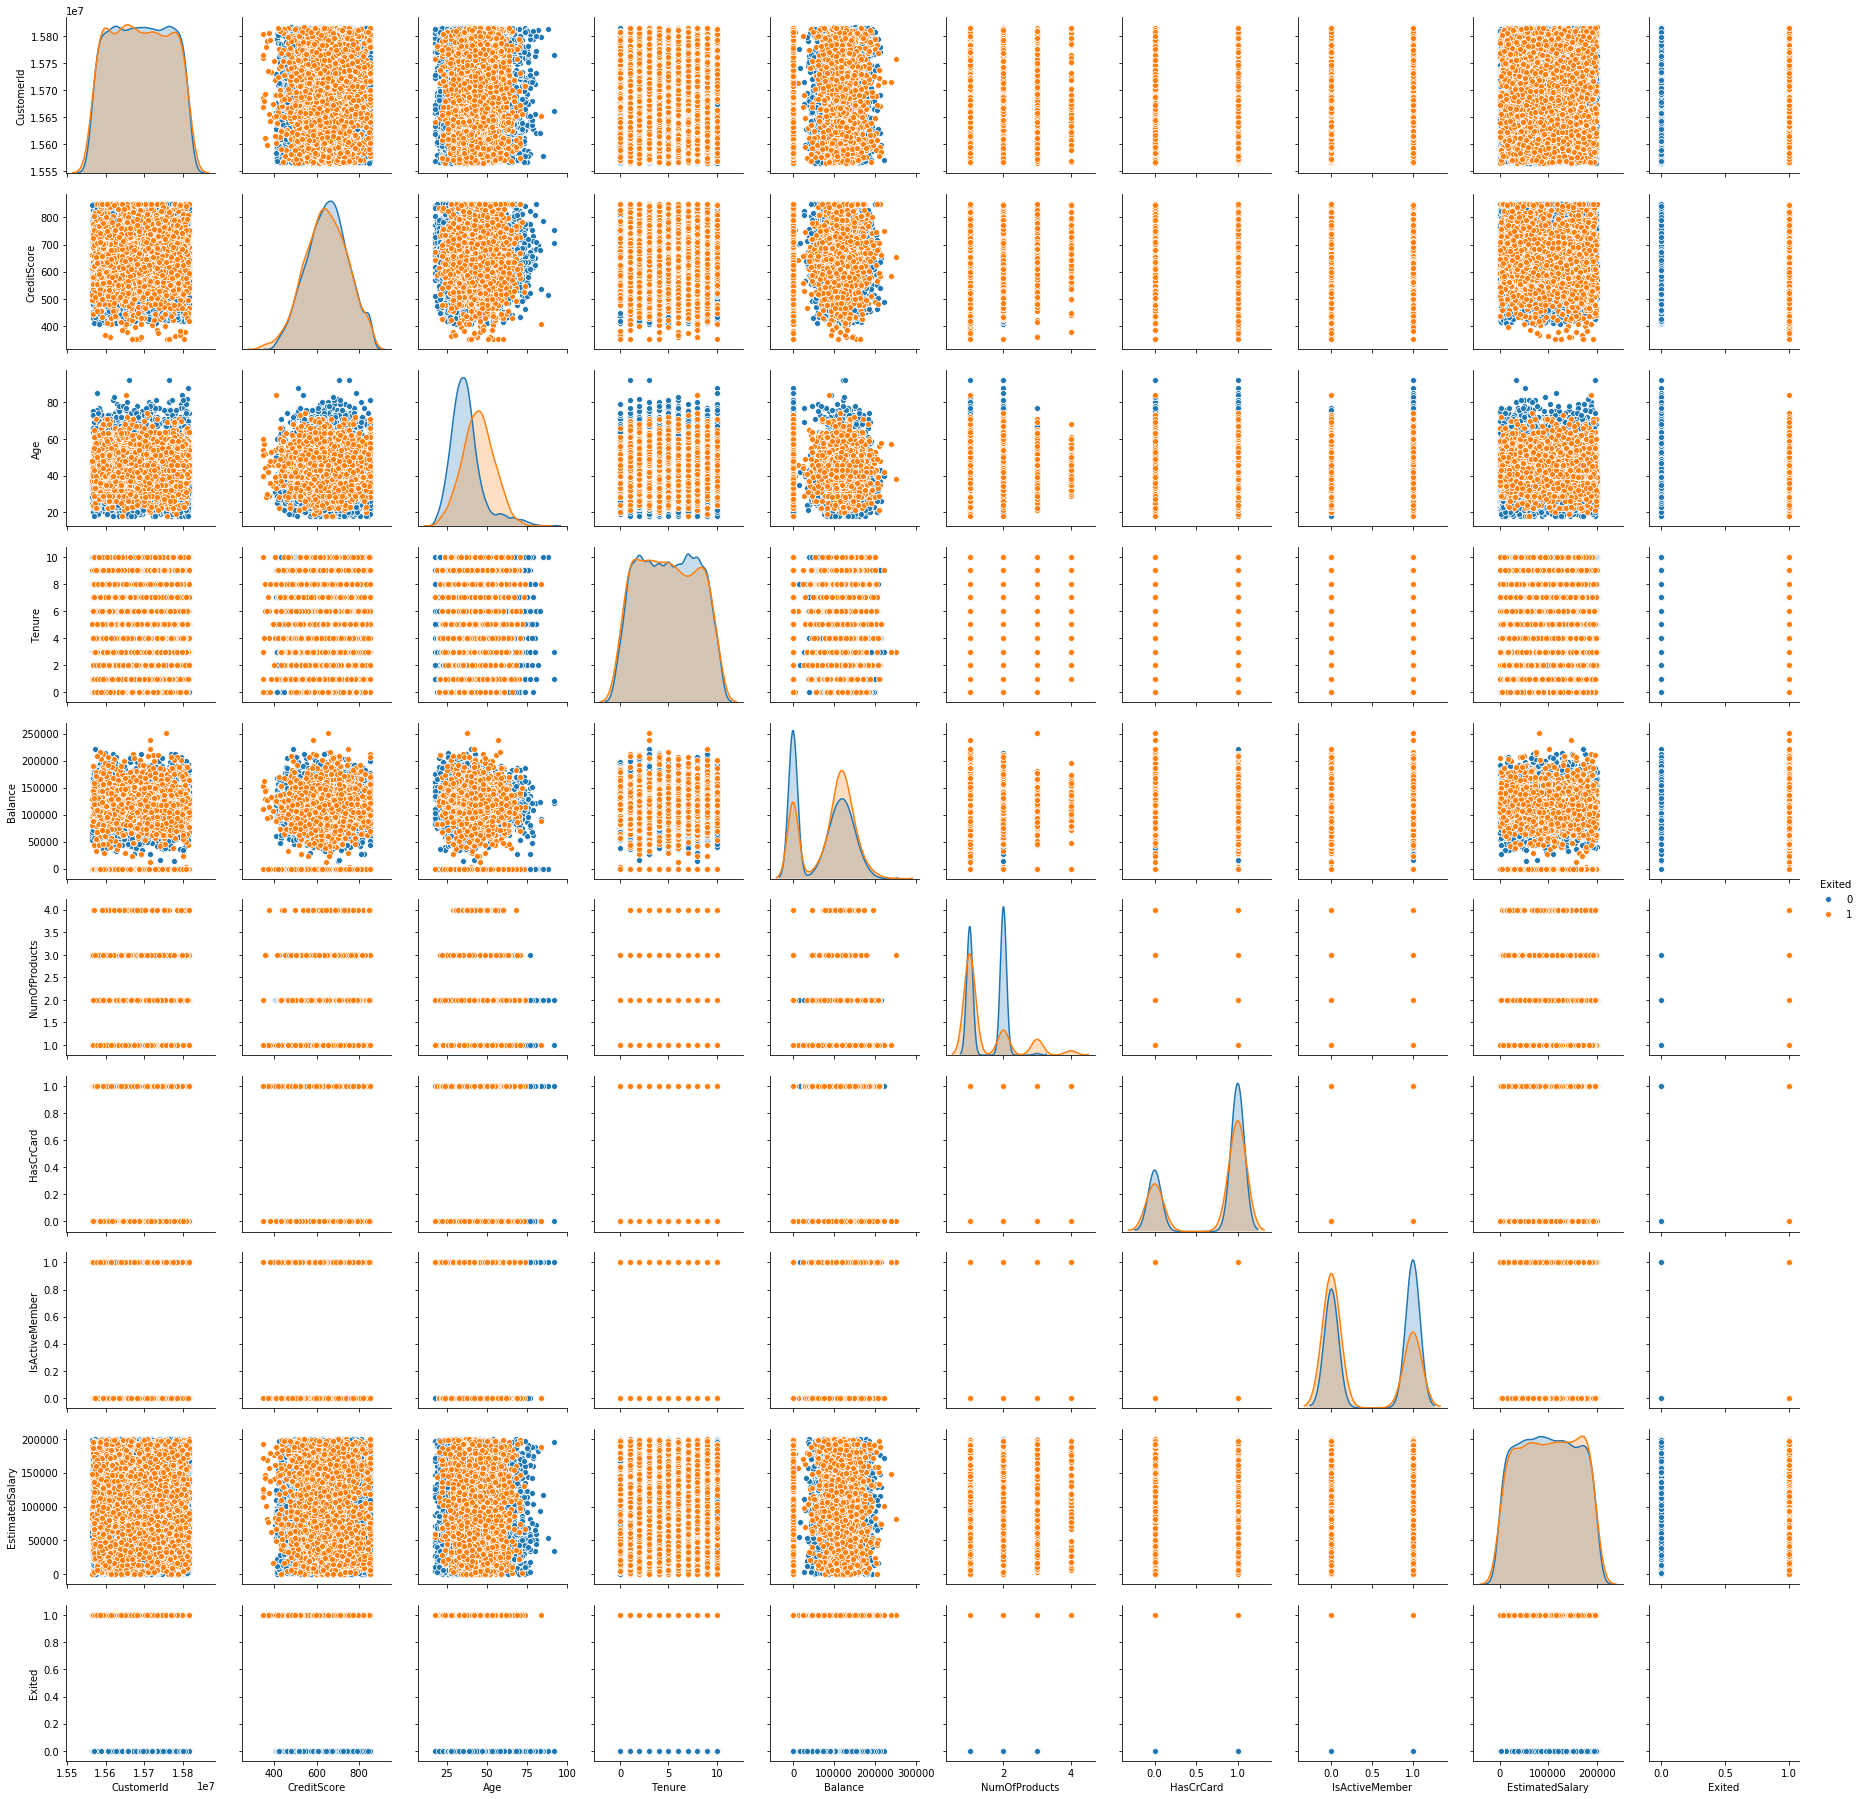

In [113]:
sns.pairplot(df_Bank,diag_kind='kde',hue = 'Exited')

Features like ('CreditScore', 'Tenure', 'EstimatedSalary') are completely overlapped and will
not be very helpful in predicting the target variable.

Moving ahead with features('Age', 'Balance', 'NoofProducts', 'HasCrCard', 'IsActiveMember') makes
more sense. 'Age' being the most promising feature for the classification.

In [114]:
#Dropping CustomerId
df_Bank.drop('CustomerId', axis = 1, inplace=True)

In [115]:
df_Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


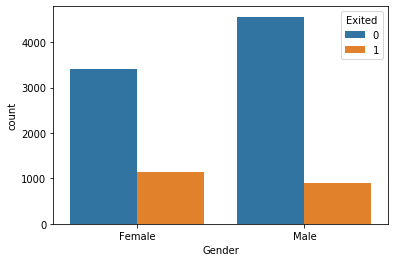

In [116]:
sns.countplot(x='Gender', hue='Exited',data=df_Bank)

More female customers of the bank has exited.

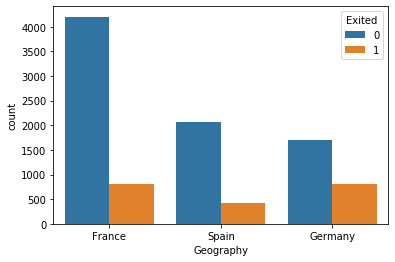

In [117]:
sns.countplot(x='Geography',hue='Exited',data=df_Bank)

Germany and France have the most unhappy customers

In [118]:
target = df_Bank.pop('Exited')
features = df_Bank

In [119]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


In [120]:
features.drop('Surname', axis = 1, inplace=True)
#features.drop('Geography', axis = 1, inplace=True)
#features.drop('Gender', axis = 1, inplace=True)

In [121]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
features.iloc[:, 1] = labelencoder_x.fit_transform(features.iloc[:, 1]) #applying on Geography
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10


In [122]:
#labelencoder_x = LabelEncoder()
features.iloc[:, 2] = labelencoder_x.fit_transform(features.iloc[:, 2]) #applying on Gender
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [123]:
from tensorflow.keras.utils import to_categorical

encoded = pd.DataFrame(to_categorical(features.iloc[:, 1]))
#no need to encode Gender, as there are only two categories

features = pd.concat([encoded, features], axis = 1)
features.head()

,0,1,2,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.0,0.0,0.0,619,0,0,42,2,0.00,1,1,1,101348.88
1,0.0,0.0,1.0,608,2,0,41,1,83807.86,1,0,1,112542.58
2,1.0,0.0,0.0,502,0,0,42,8,159660.80,3,1,0,113931.57
3,1.0,0.0,0.0,699,0,0,39,1,0.00,2,0,0,93826.63
4,0.0,0.0,1.0,850,2,0,43,2,125510.82,1,1,1,79084.10


In [124]:
features.drop('Geography', axis = 1, inplace=True)

In [125]:
from sklearn.model_selection import train_test_split
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=50)

In [126]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [133]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [211]:

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(11, activation='relu', input_shape=(12,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu', input_shape=(4,)))

# Add an output layer 
model.add(Dense(1, activation='sigmoid', input_shape=(1,)))

In [212]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 11)                143       
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 96        
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 9         
Total params: 248
Trainable params: 248
Non-trainable params: 0
_________________________________________________________________


In [213]:
#model.compile(loss='hinge',
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              #optimizer='SGD',
              metrics=['accuracy'])

In [214]:
history = model.fit(X_train, y_train,epochs=10, batch_size=1, verbose=1)

Train on 7000 samples
Epoch 1/10
7000/7000 [==============================] - 22s 3ms/sample - loss: 0.4365 - accuracy: 0.8177
Epoch 2/10
7000/7000 [==============================] - 20s 3ms/sample - loss: 0.3746 - accuracy: 0.8416
Epoch 3/10
7000/7000 [==============================] - 20s 3ms/sample - loss: 0.3528 - accuracy: 0.8564
Epoch 4/10
7000/7000 [==============================] - 21s 3ms/sample - loss: 0.3467 - accuracy: 0.8579
Epoch 5/10
7000/7000 [==============================] - 21s 3ms/sample - loss: 0.3424 - accuracy: 0.8601
Epoch 6/10
7000/7000 [==============================] - 21s 3ms/sample - loss: 0.3412 - accuracy: 0.8601
Epoch 7/10
7000/7000 [==============================] - 21s 3ms/sample - loss: 0.3397 - accuracy: 0.8626
Epoch 8/10
7000/7000 [==============================] - 20s 3ms/sample - loss: 0.3388 - accuracy: 0.8601
Epoch 9/10
7000/7000 [==============================] - 20s 3ms/sample - loss: 0.3356 - accuracy: 0.8606
Epoch 10/10
7000/7000 [==========

y_pred = np.round(model.predict(X_test))
score = model.evaluate(X_test, y_pred)
print(score)

In [215]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [216]:
y_pred

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [217]:
metrics.confusion_matrix(y_test, y_pred)

array([[2331,   70],
       [ 345,  254]], dtype=int64)

In [218]:
metrics.classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.97      0.92      2401\n           1       0.78      0.42      0.55       599\n\n    accuracy                           0.86      3000\n   macro avg       0.83      0.70      0.73      3000\nweighted avg       0.85      0.86      0.84      3000\n'

In [219]:
print((2331+254)/3000)

0.8616666666666667
